<a href="https://colab.research.google.com/github/Rohan5076/practice-code/blob/main/Seeds.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import graphviz


In [2]:
#loading the data set
df = pd.read_csv("/content/drive/MyDrive/All CSV files-20220711T101939Z-001/All CSV files/wheatseeds.csv")
df.head()

,Area,Parameter,Compactness,Length of kernel,Width of kernel,Aymmetery coefficient,length kernel groove,"class(1,2,3)"
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


In [3]:
#check the shape of our data
df.shape

(210, 8)

In [4]:
#chech the columns in our data
df.columns

Index(['Area', 'Parameter', 'Compactness', 'Length of kernel',
       'Width of kernel', 'Aymmetery coefficient', 'length kernel groove',
       'class(1,2,3)'],
      dtype='object')

In [5]:
#check the duplicate values
df.duplicated().sum()

0

In [6]:
#taking info of our dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Area                   210 non-null    float64
 1   Parameter              210 non-null    float64
 2   Compactness            210 non-null    float64
 3   Length of kernel       210 non-null    float64
 4   Width of kernel        210 non-null    float64
 5   Aymmetery coefficient  210 non-null    float64
 6   length kernel groove   210 non-null    float64
 7   class(1,2,3)           210 non-null    int64  
dtypes: float64(7), int64(1)
memory usage: 13.2 KB


In [7]:
#checking the null values in our dataset
df.isnull().sum()

Area                     0
Parameter                0
Compactness              0
Length of kernel         0
Width of kernel          0
Aymmetery coefficient    0
length kernel groove     0
class(1,2,3)             0
dtype: int64

In [8]:
df.describe()

,Area,Parameter,Compactness,Length of kernel,Width of kernel,Aymmetery coefficient,length kernel groove,"class(1,2,3)"
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071,2.000000
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480,0.818448
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000,1.000000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000,1.000000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000,2.000000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000,3.000000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000,3.000000


In [9]:
#checking unique values in our dataset
df.nunique

<bound method DataFrame.nunique of       Area  Parameter  Compactness  Length of kernel  Width of kernel  \
0    15.26      14.84       0.8710             5.763            3.312   
1    14.88      14.57       0.8811             5.554            3.333   
2    14.29      14.09       0.9050             5.291            3.337   
3    13.84      13.94       0.8955             5.324            3.379   
4    16.14      14.99       0.9034             5.658            3.562   
..     ...        ...          ...               ...              ...   
205  12.19      13.20       0.8783             5.137            2.981   
206  11.23      12.88       0.8511             5.140            2.795   
207  13.20      13.66       0.8883             5.236            3.232   
208  11.84      13.21       0.8521             5.175            2.836   
209  12.30      13.34       0.8684             5.243            2.974   

     Aymmetery coefficient  length kernel groove  class(1,2,3)  
0                    2.

In [10]:
df.head()

,Area,Parameter,Compactness,Length of kernel,Width of kernel,Aymmetery coefficient,length kernel groove,"class(1,2,3)"
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


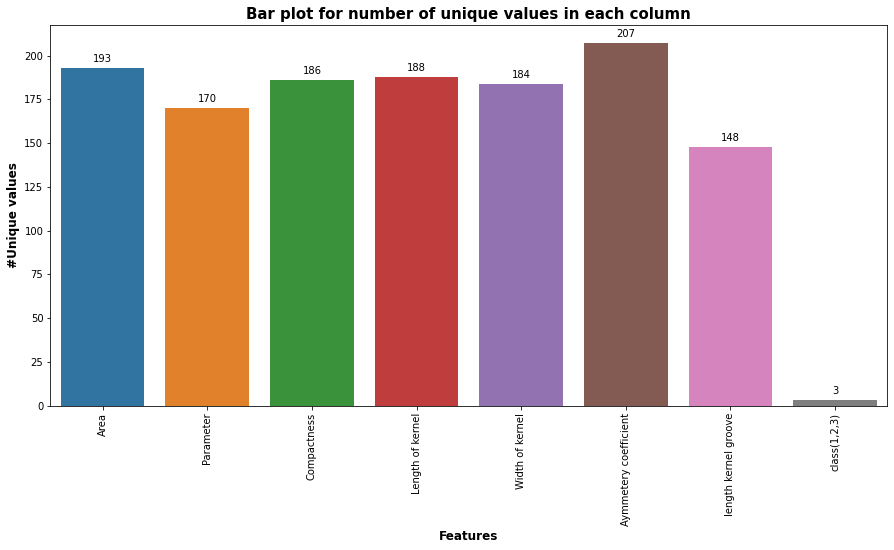

In [11]:
unique_df = pd.DataFrame()
unique_df['Features'] = df.columns
unique=[]
for i in df.columns:
    unique.append(df[i].nunique())
unique_df['Uniques'] = unique

f, ax = plt.subplots(1,1, figsize=(15,7))

splot = sns.barplot(x=unique_df['Features'], y=unique_df['Uniques'], alpha=1)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center',
                   va = 'center', xytext = (0, 9), textcoords = 'offset points')
plt.title('Bar plot for number of unique values in each column',weight='bold', size=15)
plt.ylabel('#Unique values', size=12, weight='bold')
plt.xlabel('Features', size=12, weight='bold')
plt.xticks(rotation=90)
plt.show()

In [12]:
df.columns

Index(['Area', 'Parameter', 'Compactness', 'Length of kernel',
       'Width of kernel', 'Aymmetery coefficient', 'length kernel groove',
       'class(1,2,3)'],
      dtype='object')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

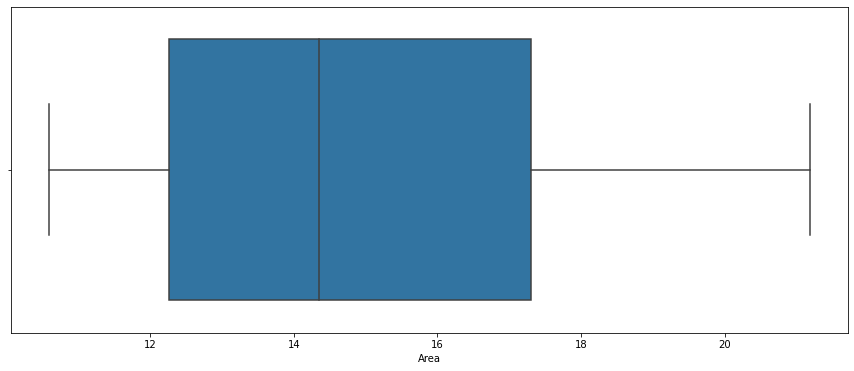

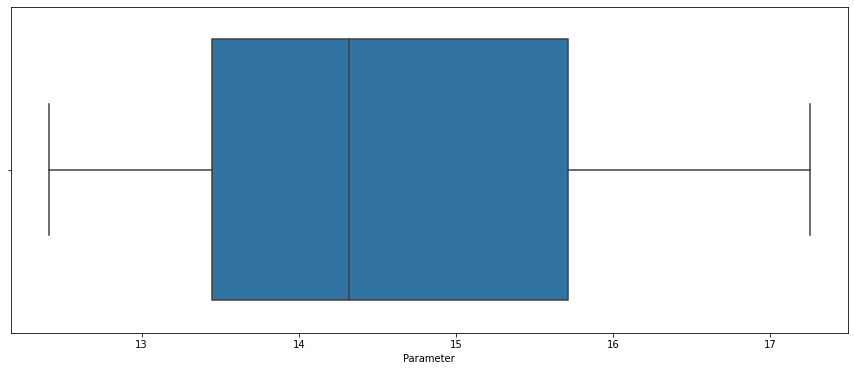

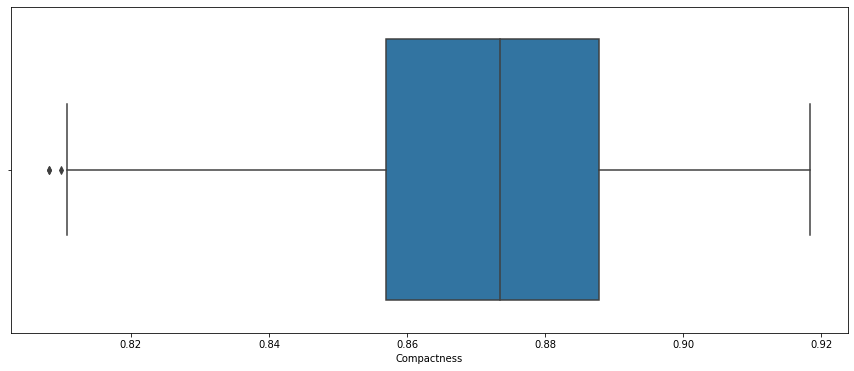

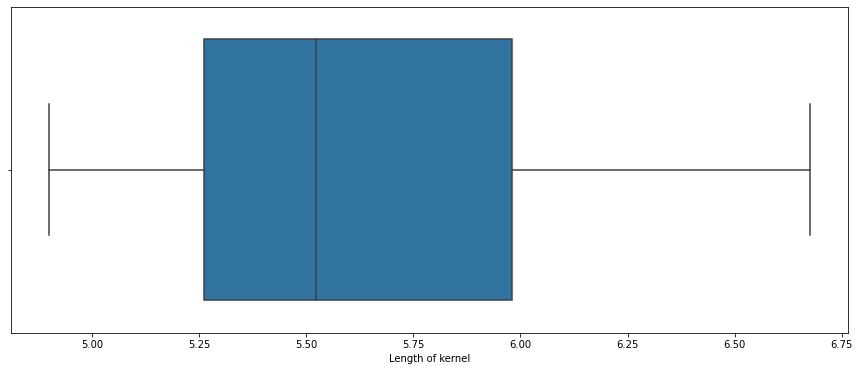

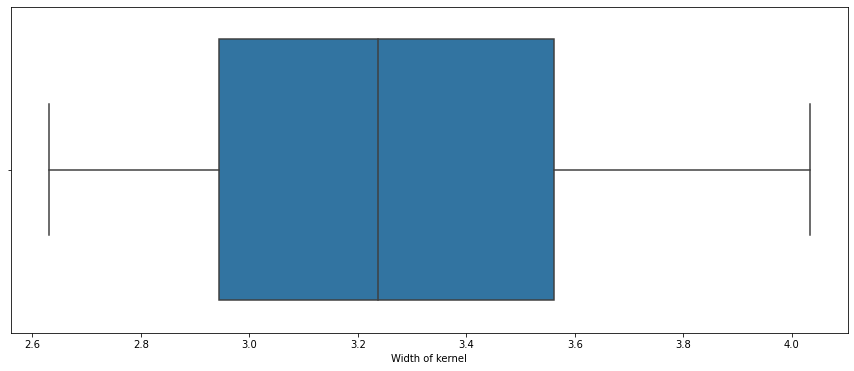

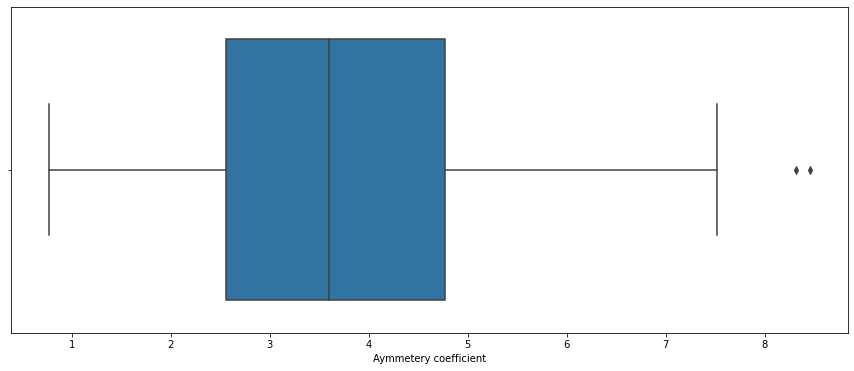

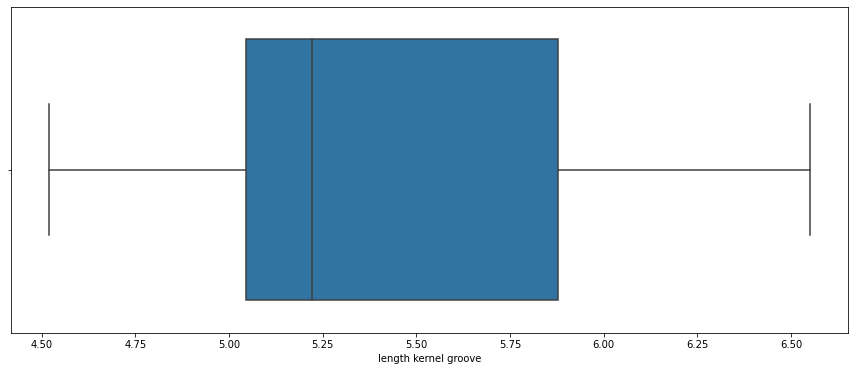

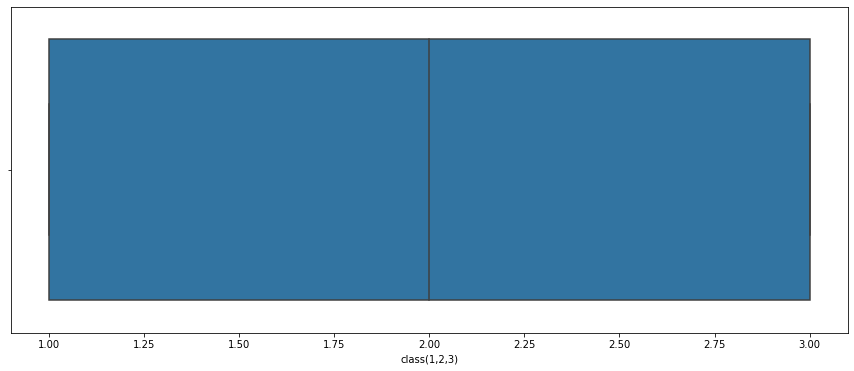

In [13]:
#see the outliers in our data
df1 = df[['Area', 'Parameter', 'Compactness', 'Length of kernel',
       'Width of kernel', 'Aymmetery coefficient', 'length kernel groove',
       'class(1,2,3)']]
for i in df1.columns:
  plt.figure(figsize=(15,6))
  sns.boxplot(df1[i])
  plt.xticks()
plt.show()

<Figure size 2160x720 with 0 Axes>

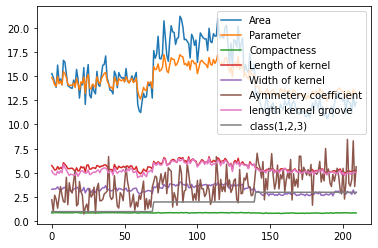

In [14]:
plt.figure(figsize=(30,10))
df.plot(y= ['Area', 'Parameter', 'Compactness', 'Length of kernel',
       'Width of kernel', 'Aymmetery coefficient', 'length kernel groove',
       'class(1,2,3)'])

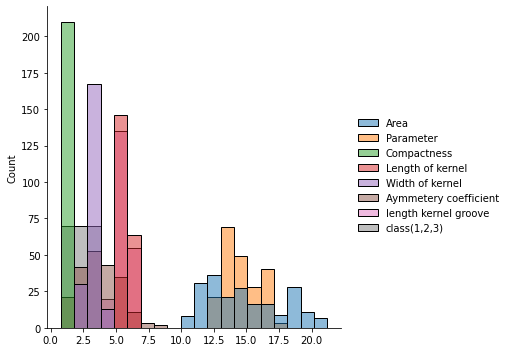

In [15]:
dist=sns.displot(df)
plt.show()

In [16]:
df.head()

,Area,Parameter,Compactness,Length of kernel,Width of kernel,Aymmetery coefficient,length kernel groove,"class(1,2,3)"
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


In [17]:
df1 = df.groupby(['Length of kernel'],)['Width of kernel'].aggregate('count').reset_index().sort_values('Width of kernel', ascending=False)

In [18]:
df1

,Length of kernel,Width of kernel
69,5.395,3
40,5.236,3
142,6.037,2
13,5.090,2
30,5.176,2
...,...,...
71,5.405,1
72,5.408,1
73,5.410,1
74,5.412,1


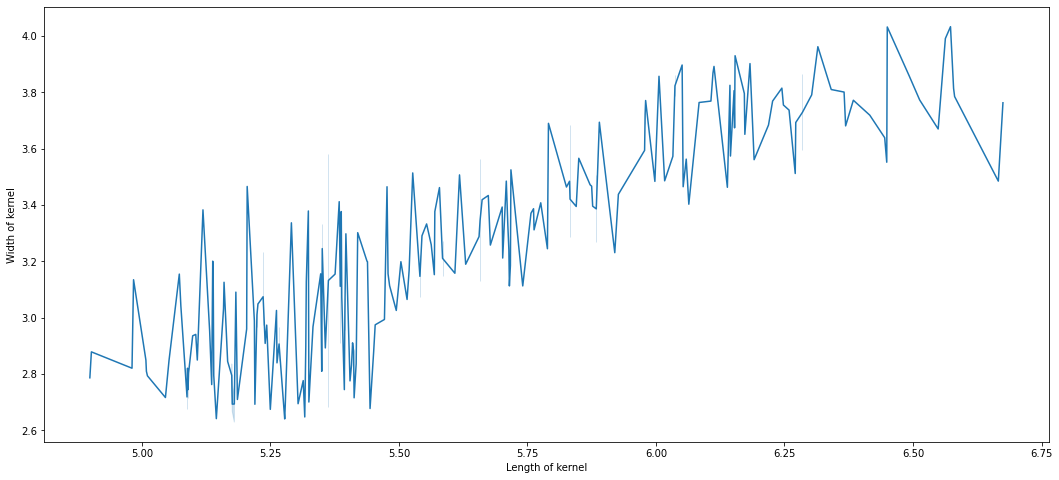

In [19]:
plt.figure(figsize=(18,8))
sns.lineplot(x='Length of kernel',y='Width of kernel',data=df)

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

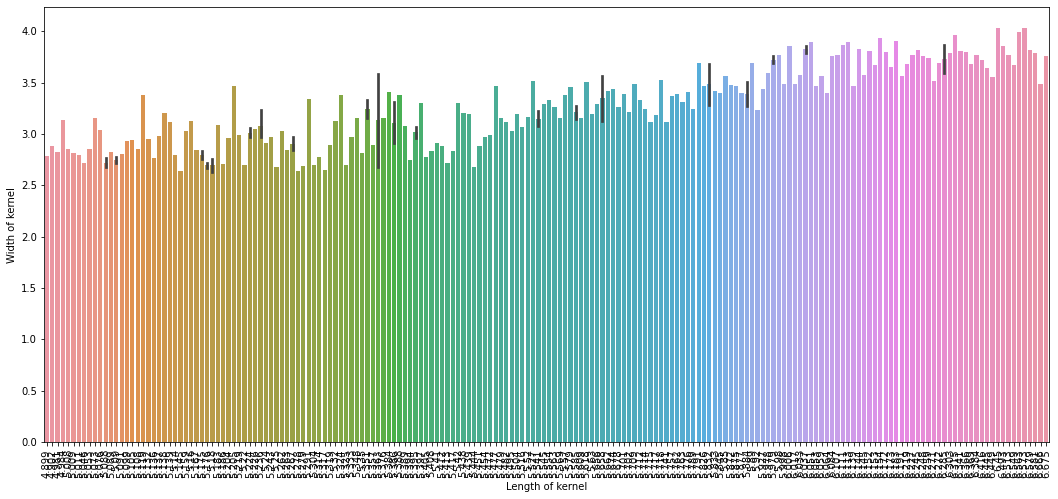

In [20]:
plt.figure(figsize=(18,8))
sns.barplot(x='Length of kernel',y='Width of kernel',data=df)
plt.xticks(rotation=90)

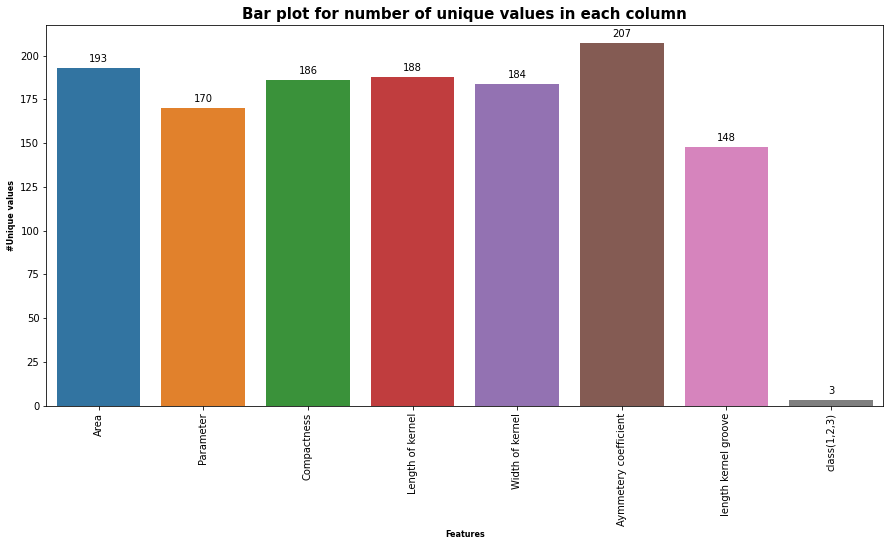

In [21]:
unique_df = pd.DataFrame()
unique_df['Features'] = df.columns
unique=[]
for i in df.columns:
    unique.append(df[i].nunique())
unique_df['class(1,2,3)'] = unique

f, ax = plt.subplots(1,1, figsize=(15,7))

splot = sns.barplot(x=unique_df['Features'], y=unique_df['class(1,2,3)'], alpha=1)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center',
                   va = 'center', xytext = (0, 9), textcoords = 'offset points')
plt.title('Bar plot for number of unique values in each column',weight='bold', size=15)
plt.ylabel('#Unique values', size=8, weight='bold')
plt.xlabel('Features', size=8, weight='bold')
plt.xticks(rotation=90)
plt.show()

In [22]:
df.columns

Index(['Area', 'Parameter', 'Compactness', 'Length of kernel',
       'Width of kernel', 'Aymmetery coefficient', 'length kernel groove',
       'class(1,2,3)'],
      dtype='object')

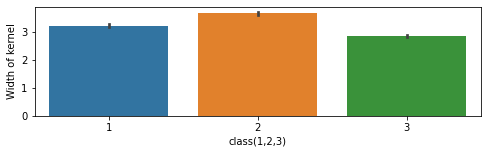

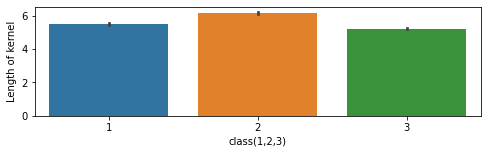

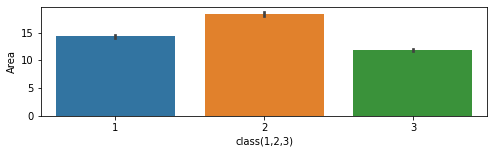

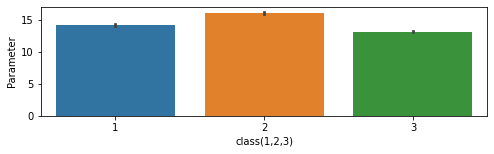

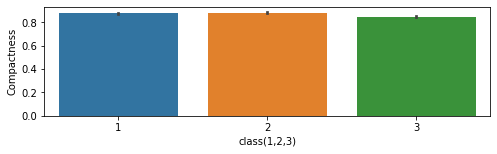

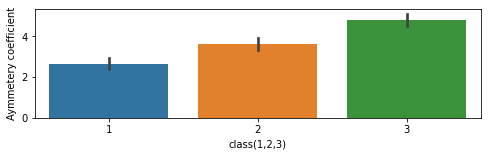

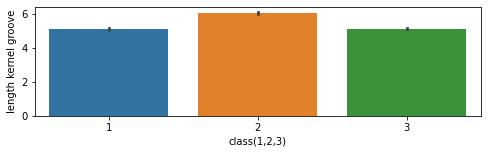

In [23]:
plt.figure(figsize=(8,2))
sns.barplot(x='class(1,2,3)',y='Width of kernel',data=df)
plt.figure(figsize=(8,2))
sns.barplot(x='class(1,2,3)',y='Length of kernel',data=df)
plt.figure(figsize=(8,2))
sns.barplot(x='class(1,2,3)',y='Area',data=df)
plt.figure(figsize=(8,2))
sns.barplot(x='class(1,2,3)',y='Parameter',data=df)
plt.figure(figsize=(8,2))
sns.barplot(x='class(1,2,3)',y='Compactness',data=df)
plt.figure(figsize=(8,2))
sns.barplot(x='class(1,2,3)',y='Aymmetery coefficient',data=df)
plt.figure(figsize=(8,2))
sns.barplot(x='class(1,2,3)',y='length kernel groove',data=df)

In [24]:
x_train, x_test, y_train, y_test = train_test_split(
	df.iloc[:, :-1], df.iloc[:, -1],
	test_size = 0.25)

print("Train data shape of X = % s and Y = % s : "%(
	x_train.shape, y_train.shape))

print("Test data shape of X = % s and Y = % s : "%(
	x_test.shape, y_test.shape))

Train data shape of X = (157, 7) and Y = (157,) : 
Test data shape of X = (53, 7) and Y = (53,) : 


In [25]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
lreg = LogisticRegression()
lreg.fit(x_train,y_train)

y_pred = lreg.predict(x_train)

# print the accuracy
print("Accuracy of Logistic Regression: ", accuracy_score(y_train, y_pred))

Accuracy of Logistic Regression:  0.9171974522292994


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [26]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
lreg = LogisticRegression()
lreg.fit(x_train,y_train)

y_pred = lreg.predict(x_test)

# print the accuracy
print("Accuracy of Logistic Regression: ", accuracy_score(y_test, y_pred))

Accuracy of Logistic Regression:  0.9245283018867925


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [27]:
print('X_train dimension= ', x_train.shape)
print('X_test dimension= ', x_test.shape)
print('y_train dimension= ', y_train.shape)
print('y_train dimension= ', y_test.shape)

X_train dimension=  (157, 7)
X_test dimension=  (53, 7)
y_train dimension=  (157,)
y_train dimension=  (53,)


In [28]:
"""
To obtain a deterministic behaviour during fitting always set value for 'random_state' attribute
Also note that default value of criteria to split the data is 'gini'
"""
cls = tree.DecisionTreeClassifier(random_state= 1)
cls.fit(x_train ,y_train)

DecisionTreeClassifier(random_state=1)

In [29]:
cls.score(x_test, y_test)

0.7924528301886793

In [30]:
cls.score(x_train, y_train)

1.0

[Text(0.5769230769230769, 0.9285714285714286, 'X[6] <= 5.576\ngini = 0.666\nsamples = 157\nvalue = [50, 53, 54]'),
 Text(0.3076923076923077, 0.7857142857142857, 'X[0] <= 13.41\ngini = 0.508\nsamples = 104\nvalue = [49, 1, 54]'),
 Text(0.15384615384615385, 0.6428571428571429, 'X[5] <= 1.538\ngini = 0.155\nsamples = 59\nvalue = [5, 0, 54]'),
 Text(0.07692307692307693, 0.5, 'gini = 0.0\nsamples = 2\nvalue = [2, 0, 0]'),
 Text(0.23076923076923078, 0.5, 'X[3] <= 5.01\ngini = 0.1\nsamples = 57\nvalue = [3, 0, 54]'),
 Text(0.15384615384615385, 0.35714285714285715, 'gini = 0.0\nsamples = 1\nvalue = [1, 0, 0]'),
 Text(0.3076923076923077, 0.35714285714285715, 'X[1] <= 13.74\ngini = 0.069\nsamples = 56\nvalue = [2, 0, 54]'),
 Text(0.23076923076923078, 0.21428571428571427, 'gini = 0.0\nsamples = 52\nvalue = [0, 0, 52]'),
 Text(0.38461538461538464, 0.21428571428571427, 'X[5] <= 4.414\ngini = 0.5\nsamples = 4\nvalue = [2, 0, 2]'),
 Text(0.3076923076923077, 0.07142857142857142, 'gini = 0.0\nsamples =

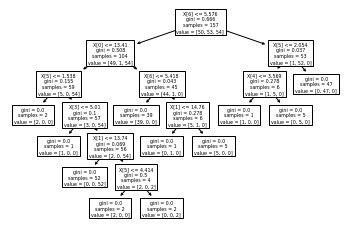

In [31]:
tree.plot_tree(cls)

# FOR gini

In [32]:
# Creating the classifier object
clf_gini = DecisionTreeClassifier(criterion = "gini",
			random_state = 100,max_depth=3, min_samples_leaf=5)

	# Performing training
clf_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, random_state=100)

In [33]:
from sklearn.metrics import confusion_matrix

## for test

In [34]:
y_pred = clf_gini.predict(x_test)
print("Confusion Matrix: ",confusion_matrix(y_test, y_pred))
	
print ("Accuracy : ",accuracy_score(y_test,y_pred)*100)
	
print("Report : ",
classification_report(y_test, y_pred))


Confusion Matrix:  [[17  0  3]
 [ 1 16  0]
 [ 1  0 15]]
Accuracy :  90.56603773584906
Report :                precision    recall  f1-score   support

           1       0.89      0.85      0.87        20
           2       1.00      0.94      0.97        17
           3       0.83      0.94      0.88        16

    accuracy                           0.91        53
   macro avg       0.91      0.91      0.91        53
weighted avg       0.91      0.91      0.91        53



### for train


In [39]:
y_pred_train = clf_gini.predict(x_train)
print("Confusion Matrix: ",confusion_matrix(y_train, y_pred_train))
	
print ("Accuracy : ",accuracy_score(y_train,y_pred_train)*100)
	
print("Report : ",
classification_report(y_train, y_pred_train))

Confusion Matrix:  [[47  1  2]
 [ 1 52  0]
 [ 3  0 51]]
Accuracy :  95.54140127388536
Report :                precision    recall  f1-score   support

           1       0.92      0.94      0.93        50
           2       0.98      0.98      0.98        53
           3       0.96      0.94      0.95        54

    accuracy                           0.96       157
   macro avg       0.95      0.96      0.96       157
weighted avg       0.96      0.96      0.96       157



# FOR ENTROPY

In [41]:
# Creating the classifier object
clf_entropy = DecisionTreeClassifier(criterion = "entropy",
			random_state = 100,max_depth=3, min_samples_leaf=5)

	# Performing training
clf_entropy.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5,
                       random_state=100)

### for test data

In [42]:
y_pred = clf_entropy.predict(x_test)
print("Confusion Matrix: ",confusion_matrix(y_test, y_pred))
	
print ("Accuracy : ",accuracy_score(y_test,y_pred)*100)
	
print("Report : ",
classification_report(y_test, y_pred))

Confusion Matrix:  [[11  0  9]
 [ 1 16  0]
 [ 0  0 16]]
Accuracy :  81.13207547169812
Report :                precision    recall  f1-score   support

           1       0.92      0.55      0.69        20
           2       1.00      0.94      0.97        17
           3       0.64      1.00      0.78        16

    accuracy                           0.81        53
   macro avg       0.85      0.83      0.81        53
weighted avg       0.86      0.81      0.81        53



### for train data

In [43]:
y_pred_train = clf_entropy.predict(x_train)
print("Confusion Matrix: ",confusion_matrix(y_train, y_pred_train))
	
print ("Accuracy : ",accuracy_score(y_train,y_pred_train)*100)
	
print("Report : ",
classification_report(y_train, y_pred_train))

Confusion Matrix:  [[44  1  5]
 [ 1 52  0]
 [ 0  0 54]]
Accuracy :  95.54140127388536
Report :                precision    recall  f1-score   support

           1       0.98      0.88      0.93        50
           2       0.98      0.98      0.98        53
           3       0.92      1.00      0.96        54

    accuracy                           0.96       157
   macro avg       0.96      0.95      0.95       157
weighted avg       0.96      0.96      0.95       157

